# Imports

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# species is not a category, lets convert it
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
df['species'] = df['species'].astype('category')

In [6]:
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


# Dataset Summary

In [8]:
# checking the number of rows in our dataset
df.shape

(150, 5)

In [9]:
# no missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# checking the distributions and if there are missing values -> all good in terms of missing values
df.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [11]:
# we have a balanced dataset with 50 of each target
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Dataset distributions

In [12]:
target = 'species'

In [13]:
columns = df.columns.tolist()

columns.remove(target)

In [14]:
columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

<Axes: >

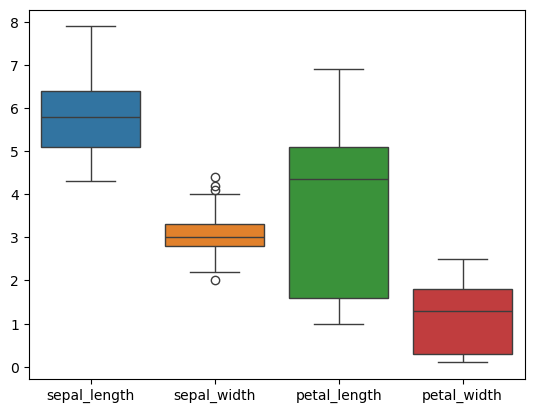

In [15]:
# sepal width appears to have very few outliers using the whiskers method
sns.boxplot(df)

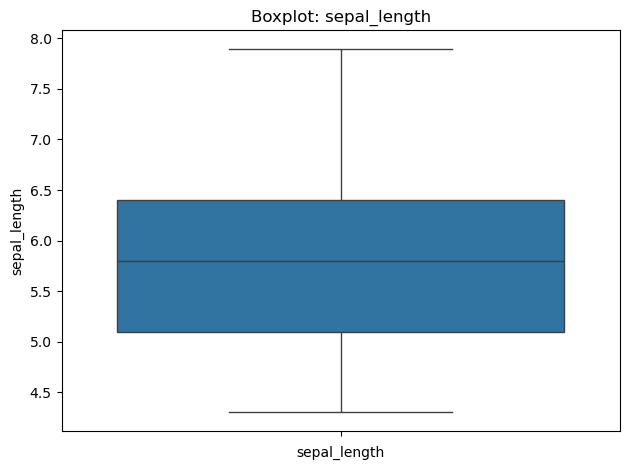

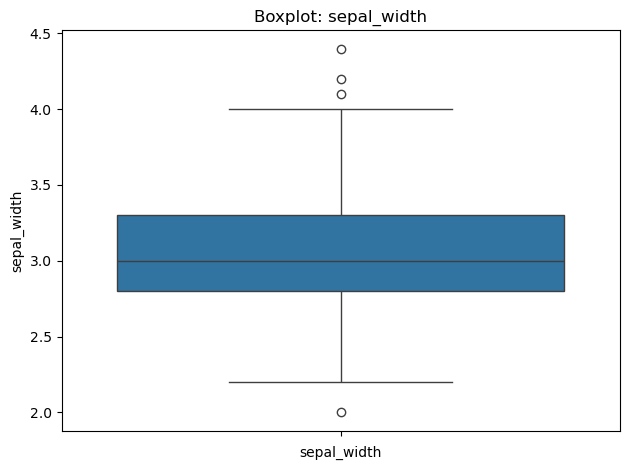

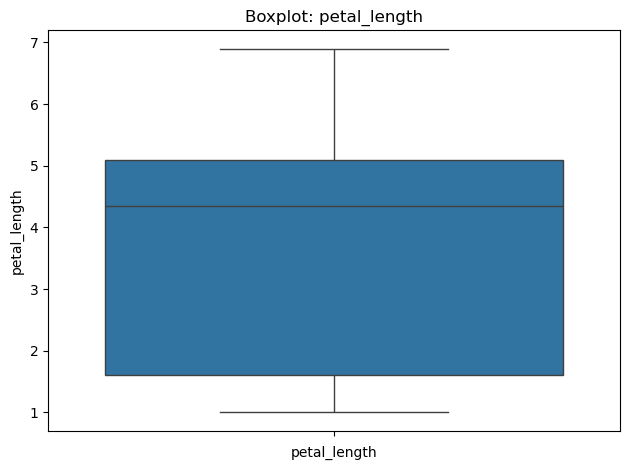

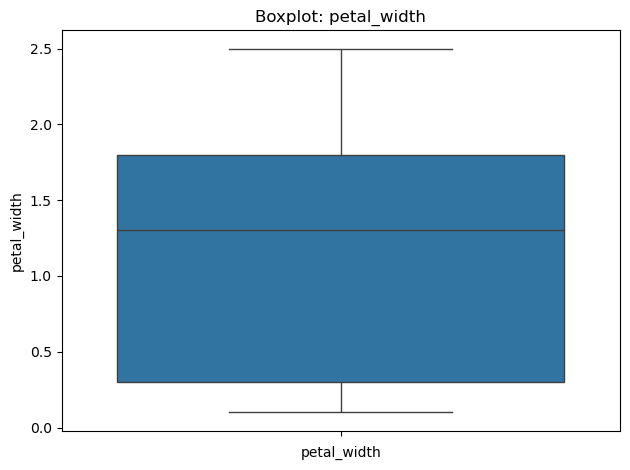

In [16]:
for column in columns:
    plt.figure()
    sns.boxplot(df[column])
    plt.title(f'Boxplot: {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

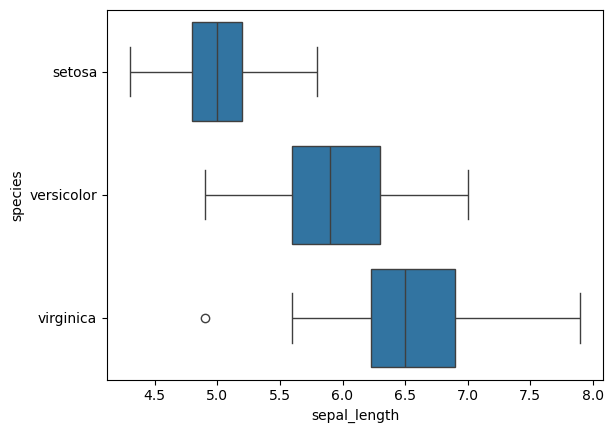

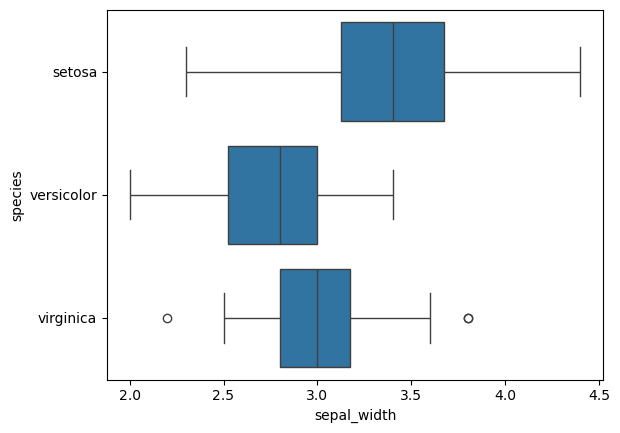

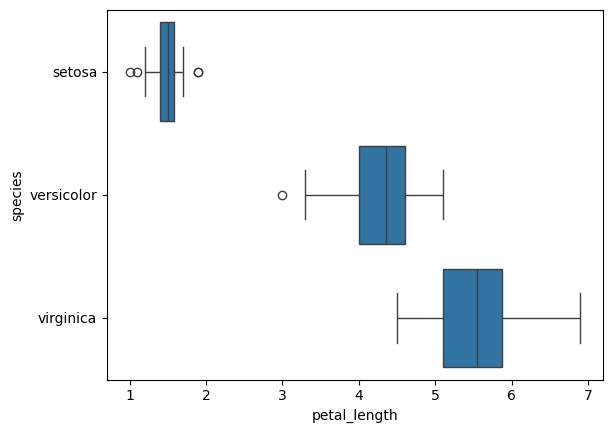

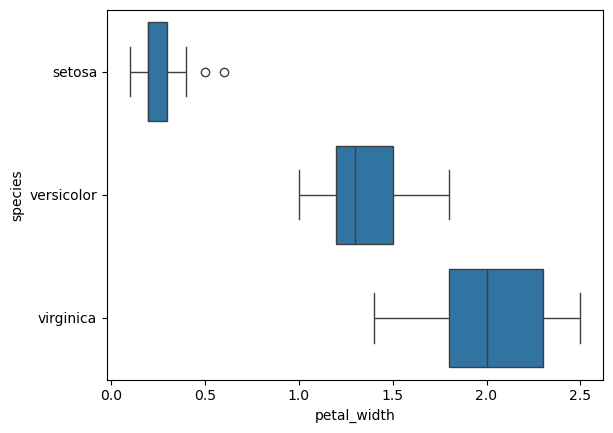

In [17]:
# sepal length, petal length and petal width appear to be good variables to detect the target
for column in columns:
    sns.boxplot(data = df, x = column, y = target)
    plt.show()

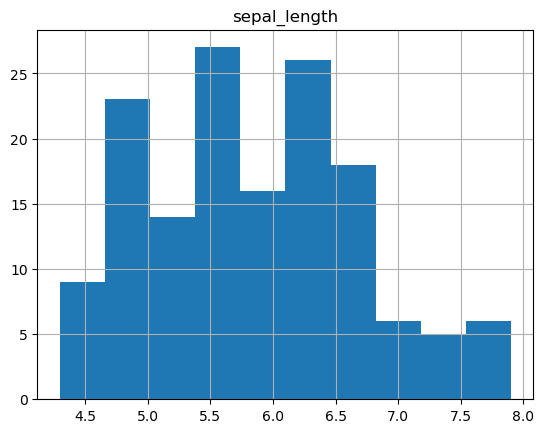

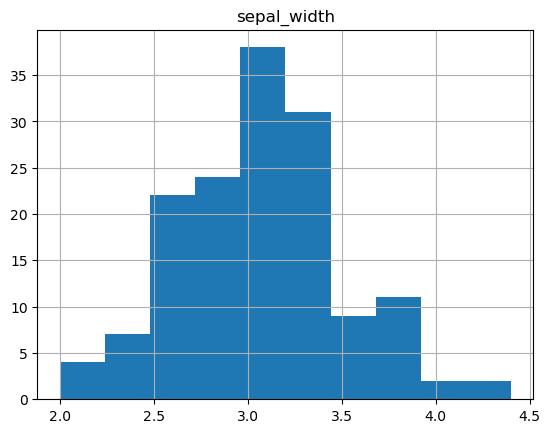

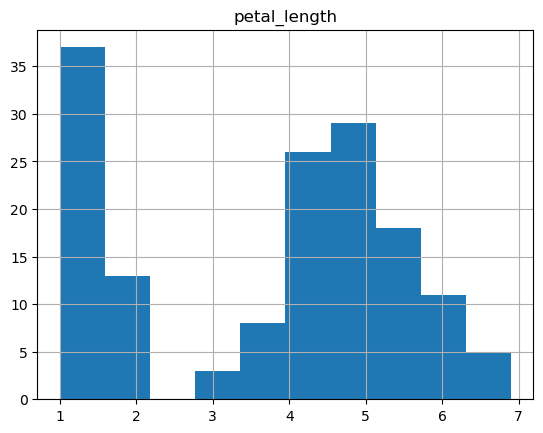

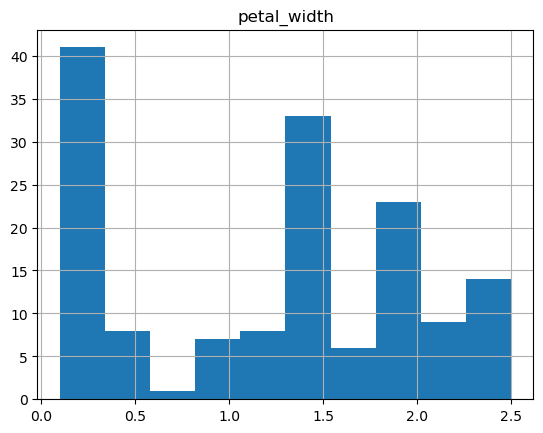

In [18]:
for column in columns:
    df.hist(column)

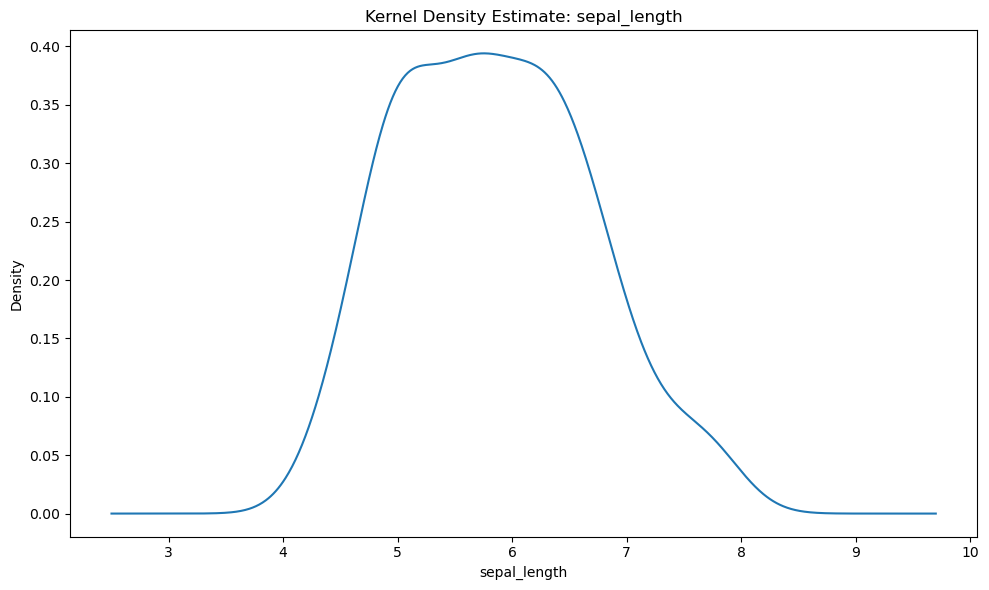

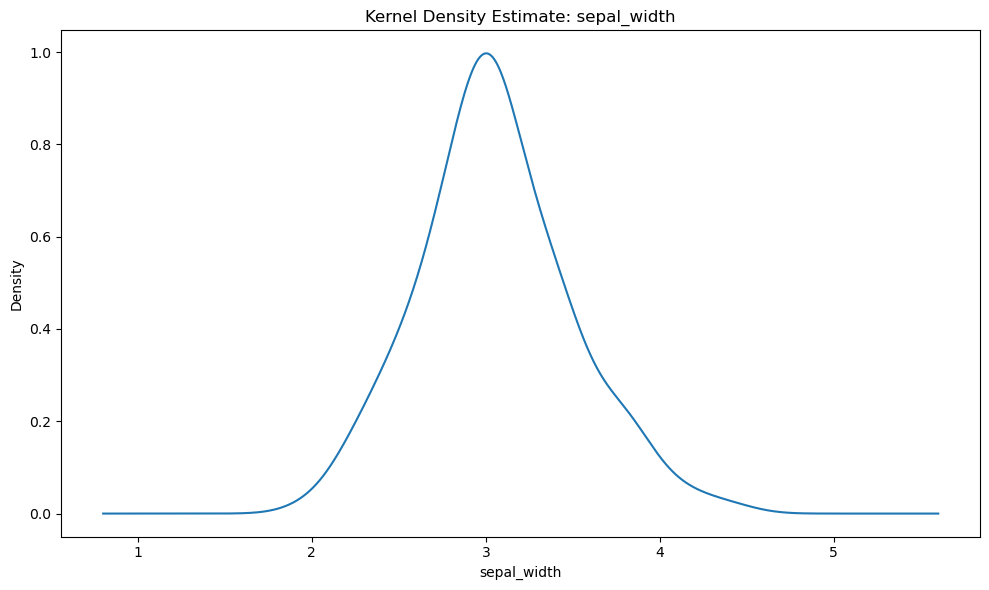

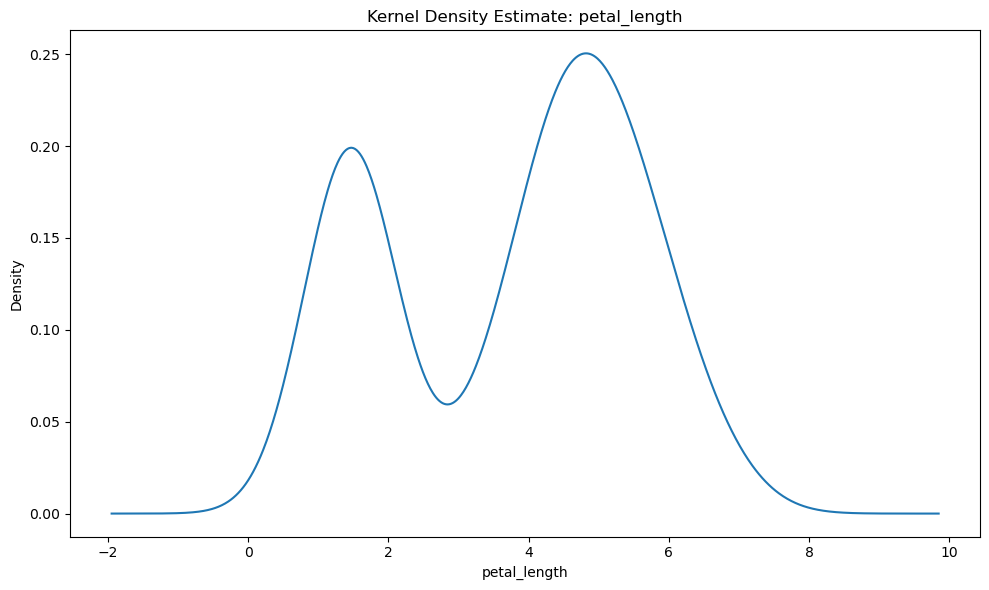

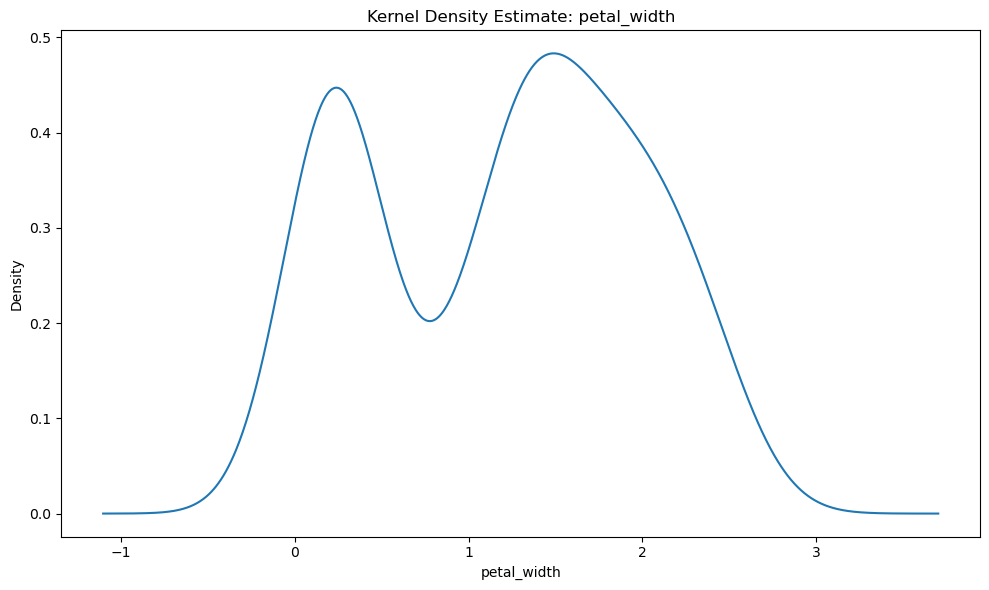

In [19]:
for column in columns:
    plt.figure(figsize = (10,6))
    df[column].plot(kind = 'kde')
    plt.title(f'Kernel Density Estimate: {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

# Correlations

<Axes: >

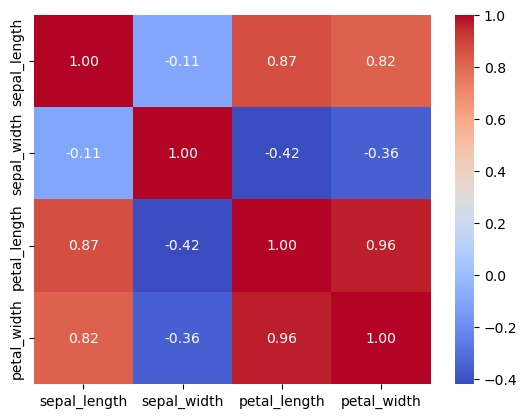

In [20]:
# correlation matrix for the numeric variables
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt='.2f')

In [31]:
from scipy.stats import f_oneway

for column in columns:
    groups = [df[df[target] == i][column] for i in df[target].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"{column}: \nF-statistic: {f_stat:.10f}, P-value: {p_value:.10f}")

sepal_length: 
F-statistic: 119.2645021845, P-value: 0.0000000000
sepal_width: 
F-statistic: 47.3644614030, P-value: 0.0000000000
petal_length: 
F-statistic: 1179.0343277002, P-value: 0.0000000000
petal_width: 
F-statistic: 959.3244057258, P-value: 0.0000000000


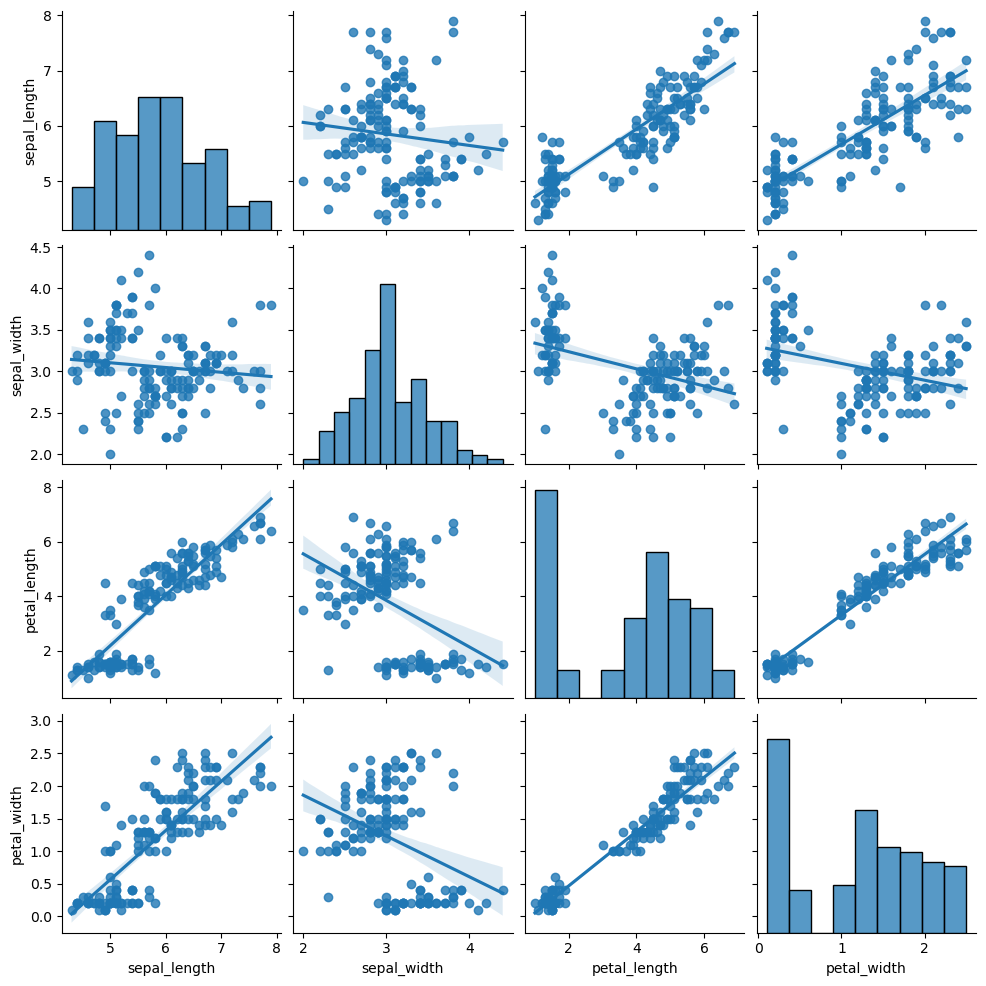

In [36]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

sns.pairplot(numerical_columns, kind = 'reg')
plt.show()

# Categorical Features

In [38]:
df[target].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='species'>

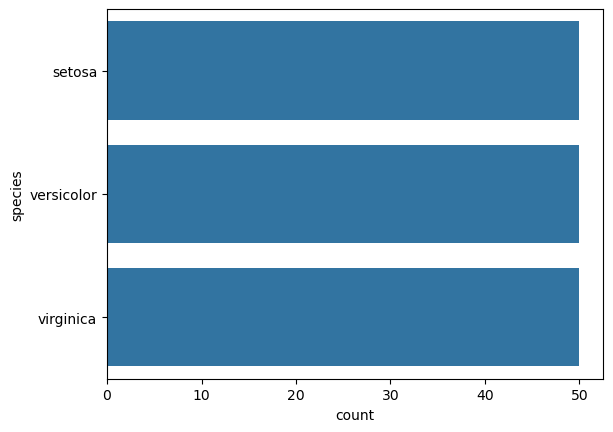

In [42]:
sns.countplot(df[target])

# Feature Relations

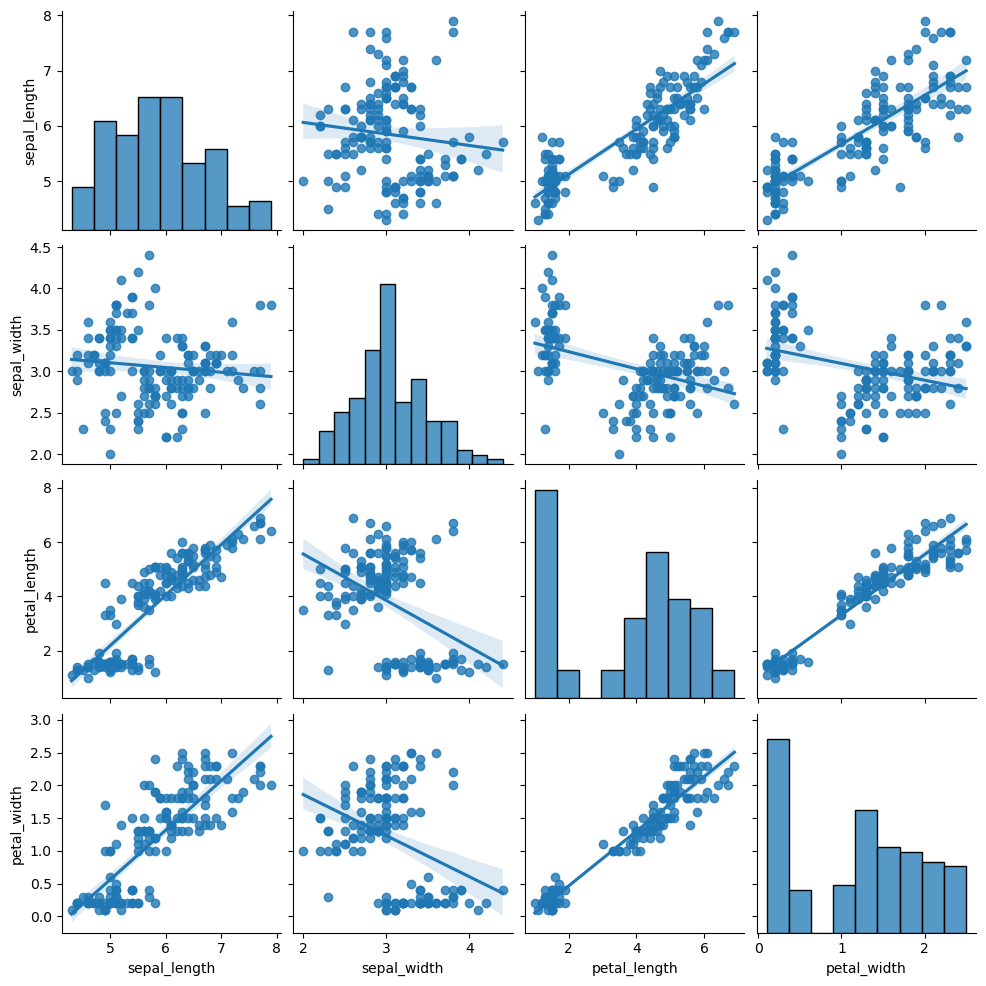

In [49]:
sns.pairplot(df, kind = 'reg')

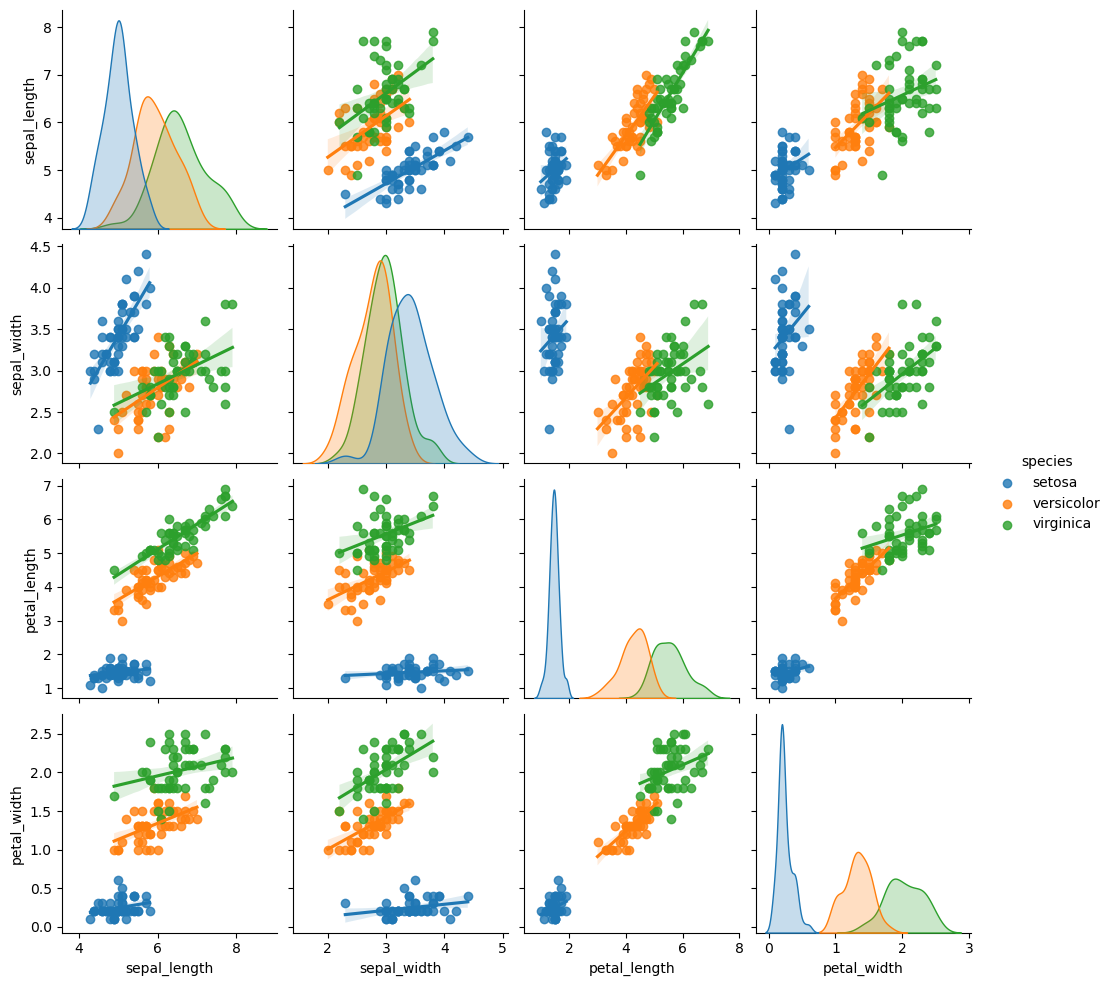

In [50]:
sns.pairplot(df, hue = target, kind = 'reg')

# Feature Engineering

In [ ]:
# later I will decide if I create new features or features to remove

# Class Balance

<Axes: xlabel='count', ylabel='species'>

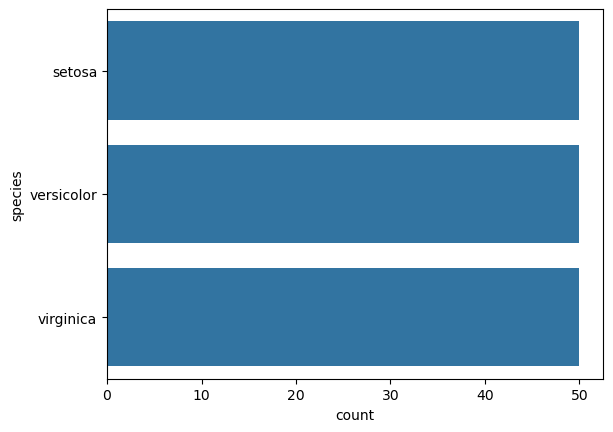

In [52]:
sns.countplot(df[target])

# Feature Scaling

In [ ]:
# later I will decide if I do any scaling or normalization